In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable

In [2]:
df = pd.read_csv("data/historico_tickets_limpio_pandas.csv", index_col= 0)
df


,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
0,GDDENR-5042564453,2016-07-13,1735,4,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,2º semestre,2016,Julio
1,GDDENR-8042508060,2016-05-18,1566,10,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,1 semestre,2016,Mayo
2,GDDESR-1342539995,2016-06-18,569,29,Sistema,Problema,0 - Sin Clasificar,0 - Sin Asignar,3,5,1 semestre,2016,Junio
3,GDDTSR-5942488006,2016-04-28,320,40,Sistema,Solicitud,0 - Sin Clasificar,0 - Sin Asignar,9,5,1 semestre,2016,Abril
4,GDLEER-0042524120,2016-06-03,1842,31,Software,Problema,2 - Normal,0 - Sin Asignar,0,5,1 semestre,2016,Junio
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29083,TWRTSR-8543883120,2020-02-22,1142,1,Sistema,Solicitud,3 - Mayor,1 - Baja,11,5,1 semestre,2020,Febrero
29084,TWRTSR-8744097039,2020-09-23,223,40,Sistema,Solicitud,1 - Menor,1 - Baja,7,4,2º semestre,2020,Septiembre
29085,TWRTSR-9643846768,2020-01-16,256,7,Sistema,Solicitud,3 - Mayor,1 - Baja,13,5,1 semestre,2020,Enero
29086,TWRTSR-9944138906,2020-11-03,1060,9,Sistema,Solicitud,1 - Menor,1 - Baja,9,5,2º semestre,2020,Noviembre


1. Explorar los valores nulos.


In [3]:
df.isnull().sum()

id_ticket          0
fecha              0
id_empleado        0
id_agente          0
categoría          0
tipo               0
severidad          0
prioridad          0
días_resolución    0
satisfacción       0
semestre           0
año                0
mes                0
dtype: int64

In [4]:
df.stb.missing()

,missing,total,percent
id_ticket,0,97386,0.0
fecha,0,97386,0.0
id_empleado,0,97386,0.0
id_agente,0,97386,0.0
categoría,0,97386,0.0
tipo,0,97386,0.0
severidad,0,97386,0.0
prioridad,0,97386,0.0
días_resolución,0,97386,0.0
satisfacción,0,97386,0.0


In [5]:
df.describe()

,id_empleado,id_agente,días_resolución,satisfacción,año
count,97386.000000,97386.000000,97386.000000,97386.000000,97386.000000
mean,999.160639,25.468856,4.552749,4.100990,2018.399164
std,577.407222,14.449455,4.365432,1.257093,1.393095
min,1.000000,1.000000,0.000000,1.000000,2016.000000
25%,500.000000,13.000000,0.000000,4.000000,2017.000000
50%,999.000000,26.000000,4.000000,5.000000,2019.000000
75%,1499.000000,38.000000,7.000000,5.000000,2020.000000
max,2000.000000,50.000000,21.000000,5.000000,2020.000000


In [6]:
df.isna()

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29083,False,False,False,False,False,False,False,False,False,False,False,False,False
29084,False,False,False,False,False,False,False,False,False,False,False,False,False
29085,False,False,False,False,False,False,False,False,False,False,False,False,False
29086,False,False,False,False,False,False,False,False,False,False,False,False,False


2. Explorad la columna de categoría y reportad los resultados solo para aquellas categorías que incluyan el 70% de los datos.


In [7]:
df.stb.freq(["categoría"], thresh=70)

,categoría,count,percent,cumulative_count,cumulative_percent
0,Sistema,38961,40.006777,38961,40.006777
1,Acceso/Login,29165,29.947836,68126,69.954614
2,others,29260,30.045386,97386,100.000000


3. Explorad la columna categoría en relación al tipo de problema, filtrando de nuevo por aquellas categorías que incluyan el 70% de los datos.


In [8]:
df.stb.freq(["categoría", "tipo"], thresh=70)

,categoría,tipo,count,percent,cumulative_count,cumulative_percent
0,Sistema,Solicitud,29225,30.009447,29225,30.009447
1,Acceso/Login,Solicitud,21939,22.527879,51164,52.537326
2,Software,Solicitud,14618,15.010371,65782,67.547697
3,others,others,31604,32.452303,97386,100.000000


4. Haced los mismo para la columna tipo en relación a la columna semestre. En este caso filtrad y mostrad los datos que incluyan el 60% de los datos.


In [9]:
df.stb.freq(["semestre", "tipo"], thresh=60)

,semestre,tipo,count,percent,cumulative_count,cumulative_percent
0,2º semestre,Solicitud,37463,38.468568,37463,38.468568
1,others,others,59923,61.531432,97386,100.000000


5. Por último, realizad este análisis para la columna mes en relación a la columna tipo. Mostrad solo los resultados para las categorías que incluyan el 60% de los datos.


In [10]:
df.stb.freq(["mes", "tipo"], thresh=60)

,mes,tipo,count,percent,cumulative_count,cumulative_percent
0,Octubre,Solicitud,6378,6.549196,6378,6.549196
1,Agosto,Solicitud,6360,6.530713,12738,13.079909
2,Diciembre,Solicitud,6305,6.474237,19043,19.554145
3,Noviembre,Solicitud,6192,6.358203,25235,25.912349
4,Marzo,Solicitud,6186,6.352042,31421,32.264391
5,Septiembre,Solicitud,6168,6.333559,37589,38.597950
6,Junio,Solicitud,6107,6.270922,43696,44.868872
7,Mayo,Solicitud,6078,6.241143,49774,51.110016
8,Julio,Solicitud,6060,6.222660,55834,57.332676
9,others,others,41552,42.667324,97386,100.000000


6. Vamos a hacer un pequeño análisis de los outliers que podamos encontrar en nuestro conjunto de datos. Para realizar esto deberemos:
6.1. Quedarnos solo con la columnas que sean númericas en nuestro conjunto de datos.
6.2. Realizar un box-plot para ver cual de ellas tiene outliers e interpretar como esto nos podría afectar a las conclusiones que extraigamos de nuestros datos.
📌 Nota Igual que siempre, no nos vale solo con picar el código, queremos que nos incluyais las conclusiones que extraeis.

In [11]:
numericas = df.select_dtypes(include = np.number)
numericas

,id_empleado,id_agente,días_resolución,satisfacción,año
0,1735,4,0,5,2016
1,1566,10,0,5,2016
2,569,29,3,5,2016
3,320,40,9,5,2016
4,1842,31,0,5,2016
...,...,...,...,...,...
29083,1142,1,11,5,2020
29084,223,40,7,4,2020
29085,256,7,13,5,2020
29086,1060,9,9,5,2020


In [12]:
numericas2 = pd.DataFrame(data = numericas, columns = ["días_resolución", "satisfacción", "año"])
numericas2

,días_resolución,satisfacción,año
0,0,5,2016
1,0,5,2016
2,3,5,2016
3,9,5,2016
4,0,5,2016
...,...,...,...
29083,11,5,2020
29084,7,4,2020
29085,13,5,2020
29086,9,5,2020


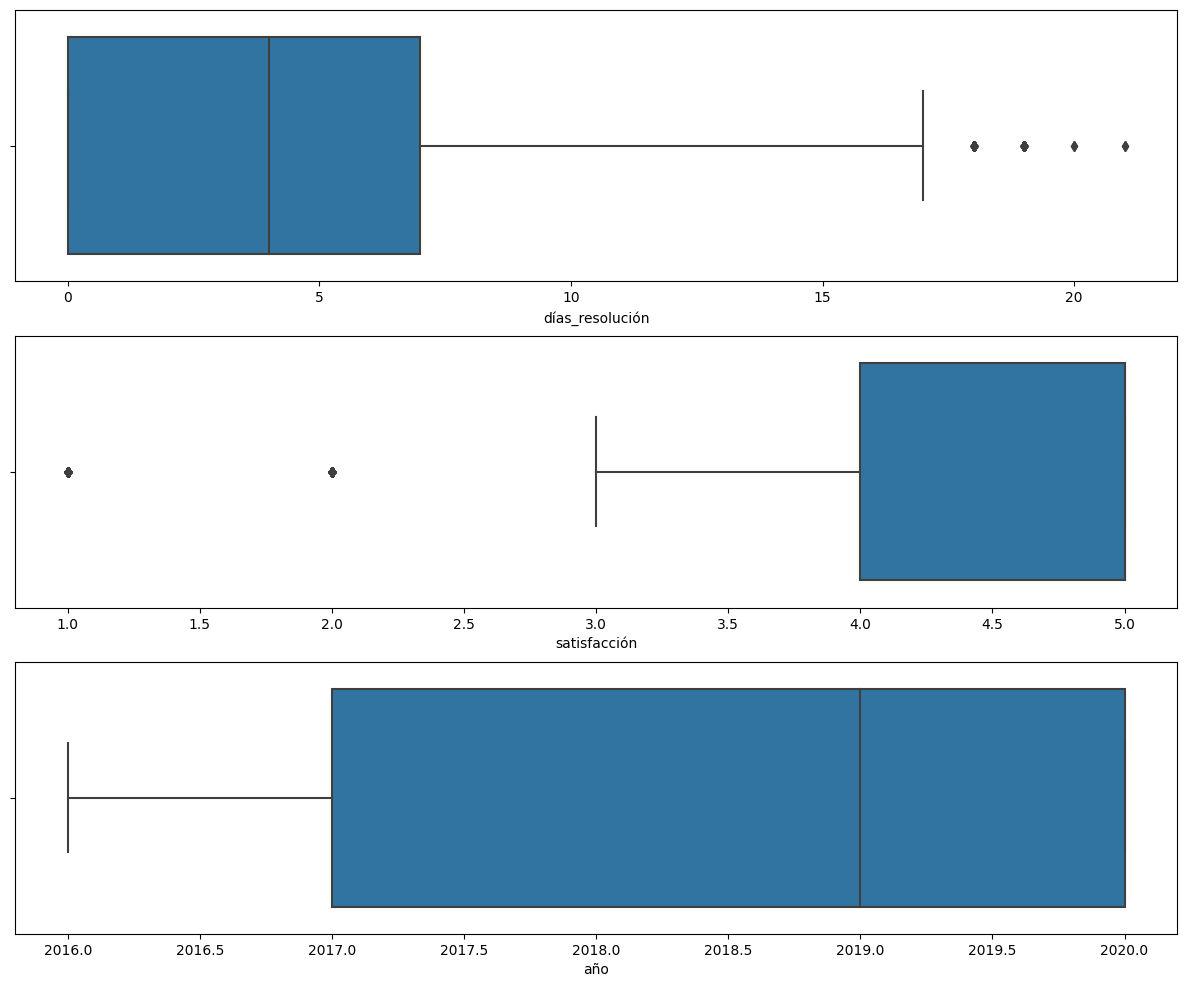

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(15,12))

for i in range(len(numericas2.columns)):
    sns.boxplot(x = numericas2.columns[i], data = df, ax=axes[i]); 

plt.show()

Observamos en el boxplot:
- En relación a los días de resolución, vemos como la mayoría de las solicitudes se han resuelto en un periodo de 0 a 6 días, colocándose la media en resolver las solicitudes en 4,5 días aprox. Sin embargo, encontramos que hay 4 casos donde el tiempo de resolución se demoró mucho más, ascendiendo entre 16 a 21 días.
- En relación a la satisfacción, contemplamos que la mayoría de los encuestados hizo una valoración de entre 4 y 5 puntos, encontrándose dentro de los valores más altos. En cambio, encontramos 2 casos con una valoración bastante baja entre 1 y 2 puntos.
- En relación al año, observamos que la franja de años se comprende entre 2017 y 2020, situándose la media en 2019 y no encontramos ningún valor atípico.

**Conclusiones:**

- En relación a los valores nulos:
Identificar las columnas que tienen nulos (lo hicimos en el ejercicio de pair programming EDA I y en el de hoy con el sidetable).
- Debatid entre vosotras qué haríais con los valores nulos, ¿los quitaríais o los reemplazaríais con un valor que nosotras decidiremos?. Cread una celda de markdown en vuestro jupyter y escribid vuestras conclusiones.

1. Al realizar distintos métodos para comprobar si existían nulos en el dataframe, observamos que todos los resultados dan 0, por lo que no existen nulos.

2. Llegamos a la conclusión de que no quitaríamos ni reemplazaríamos en principio los valores nulos de ninguna fila, y observaríamos si hay columnas donde la mayoría de sus valores sean nulos. En ese caso sí que podríamos plantearnos la posibilidad de eliminar la columna y no la fila que contiene el valor nulo, dado que puede ser que el resto de valores de esa fila sean importantes para el resto de columnas y, en definitiva, para la veracidad de los datos.